In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,recall_score,precision_score,accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
data=pd.read_csv("geophone-sensor-data.csv")

In [18]:
data.head(5)

,timestamp,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name
0,01:51:43,2046.726000,2057.666667,2035,2060,3.452186,2047.0,2043.0,2049.0,-0.152574,601.0,1.988682e+09,walking,Yusuf
1,01:51:46,2046.619333,2053.000000,2040,2053,3.580469,2047.0,2044.0,2050.0,-0.150615,300.0,1.988028e+09,walking,Yusuf
2,01:51:50,2046.598000,2056.000000,2030,2059,3.592826,2047.0,2044.0,2049.0,-0.370125,300.0,1.987897e+09,walking,Yusuf
3,01:51:53,2046.560000,2054.000000,2039,2055,3.414830,2047.0,2044.0,2049.0,-0.321296,300.0,1.987662e+09,walking,Yusuf
4,01:51:56,2046.656667,2055.000000,2034,2057,3.356802,2048.0,2044.0,2049.0,-0.379134,300.0,1.988255e+09,walking,Yusuf


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1800 non-null   object 
 1   mean           1800 non-null   float64
 2   top_3_mean     1800 non-null   float64
 3   min            1800 non-null   int64  
 4   max            1800 non-null   int64  
 5   std_dev        1800 non-null   float64
 6   median         1800 non-null   float64
 7   q1             1800 non-null   float64
 8   q3             1800 non-null   float64
 9   skewness       1800 non-null   float64
 10  dominant_freq  1800 non-null   float64
 11  energy         1800 non-null   float64
 12  activity       1800 non-null   object 
 13  name           1800 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 197.0+ KB


In [20]:
data.isnull().any()

timestamp        False
mean             False
top_3_mean       False
min              False
max              False
std_dev          False
median           False
q1               False
q3               False
skewness         False
dominant_freq    False
energy           False
activity         False
name             False
dtype: bool

In [21]:
data.describe()

,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1.800000e+03
mean,2042.246501,2064.689630,2016.367222,2067.155556,8.528827,2043.395556,2037.628333,2048.029722,-0.347341,410.099444,1.961492e+09
std,3.659114,28.293622,28.134259,31.800504,10.760641,5.044266,4.490098,9.018572,0.411987,152.875171,2.270491e+07
min,2034.810667,2039.000000,1948.000000,2039.000000,1.374898,2034.000000,2021.000000,2037.000000,-4.396233,1.000000,1.915725e+09
25%,2039.495333,2047.333333,2012.000000,2048.000000,2.710610,2040.000000,2035.000000,2042.000000,-0.671029,300.000000,1.944366e+09
50%,2041.287333,2052.333333,2031.000000,2053.000000,3.455542,2041.000000,2037.000000,2044.000000,-0.266822,300.000000,1.955328e+09
75%,2045.835667,2065.333333,2035.000000,2070.000000,4.707158,2048.000000,2040.000000,2050.000000,-0.058154,600.000000,1.984179e+09
max,2050.708667,2232.666667,2045.000000,2261.000000,37.678959,2056.000000,2049.000000,2069.000000,1.639461,601.000000,2.013153e+09


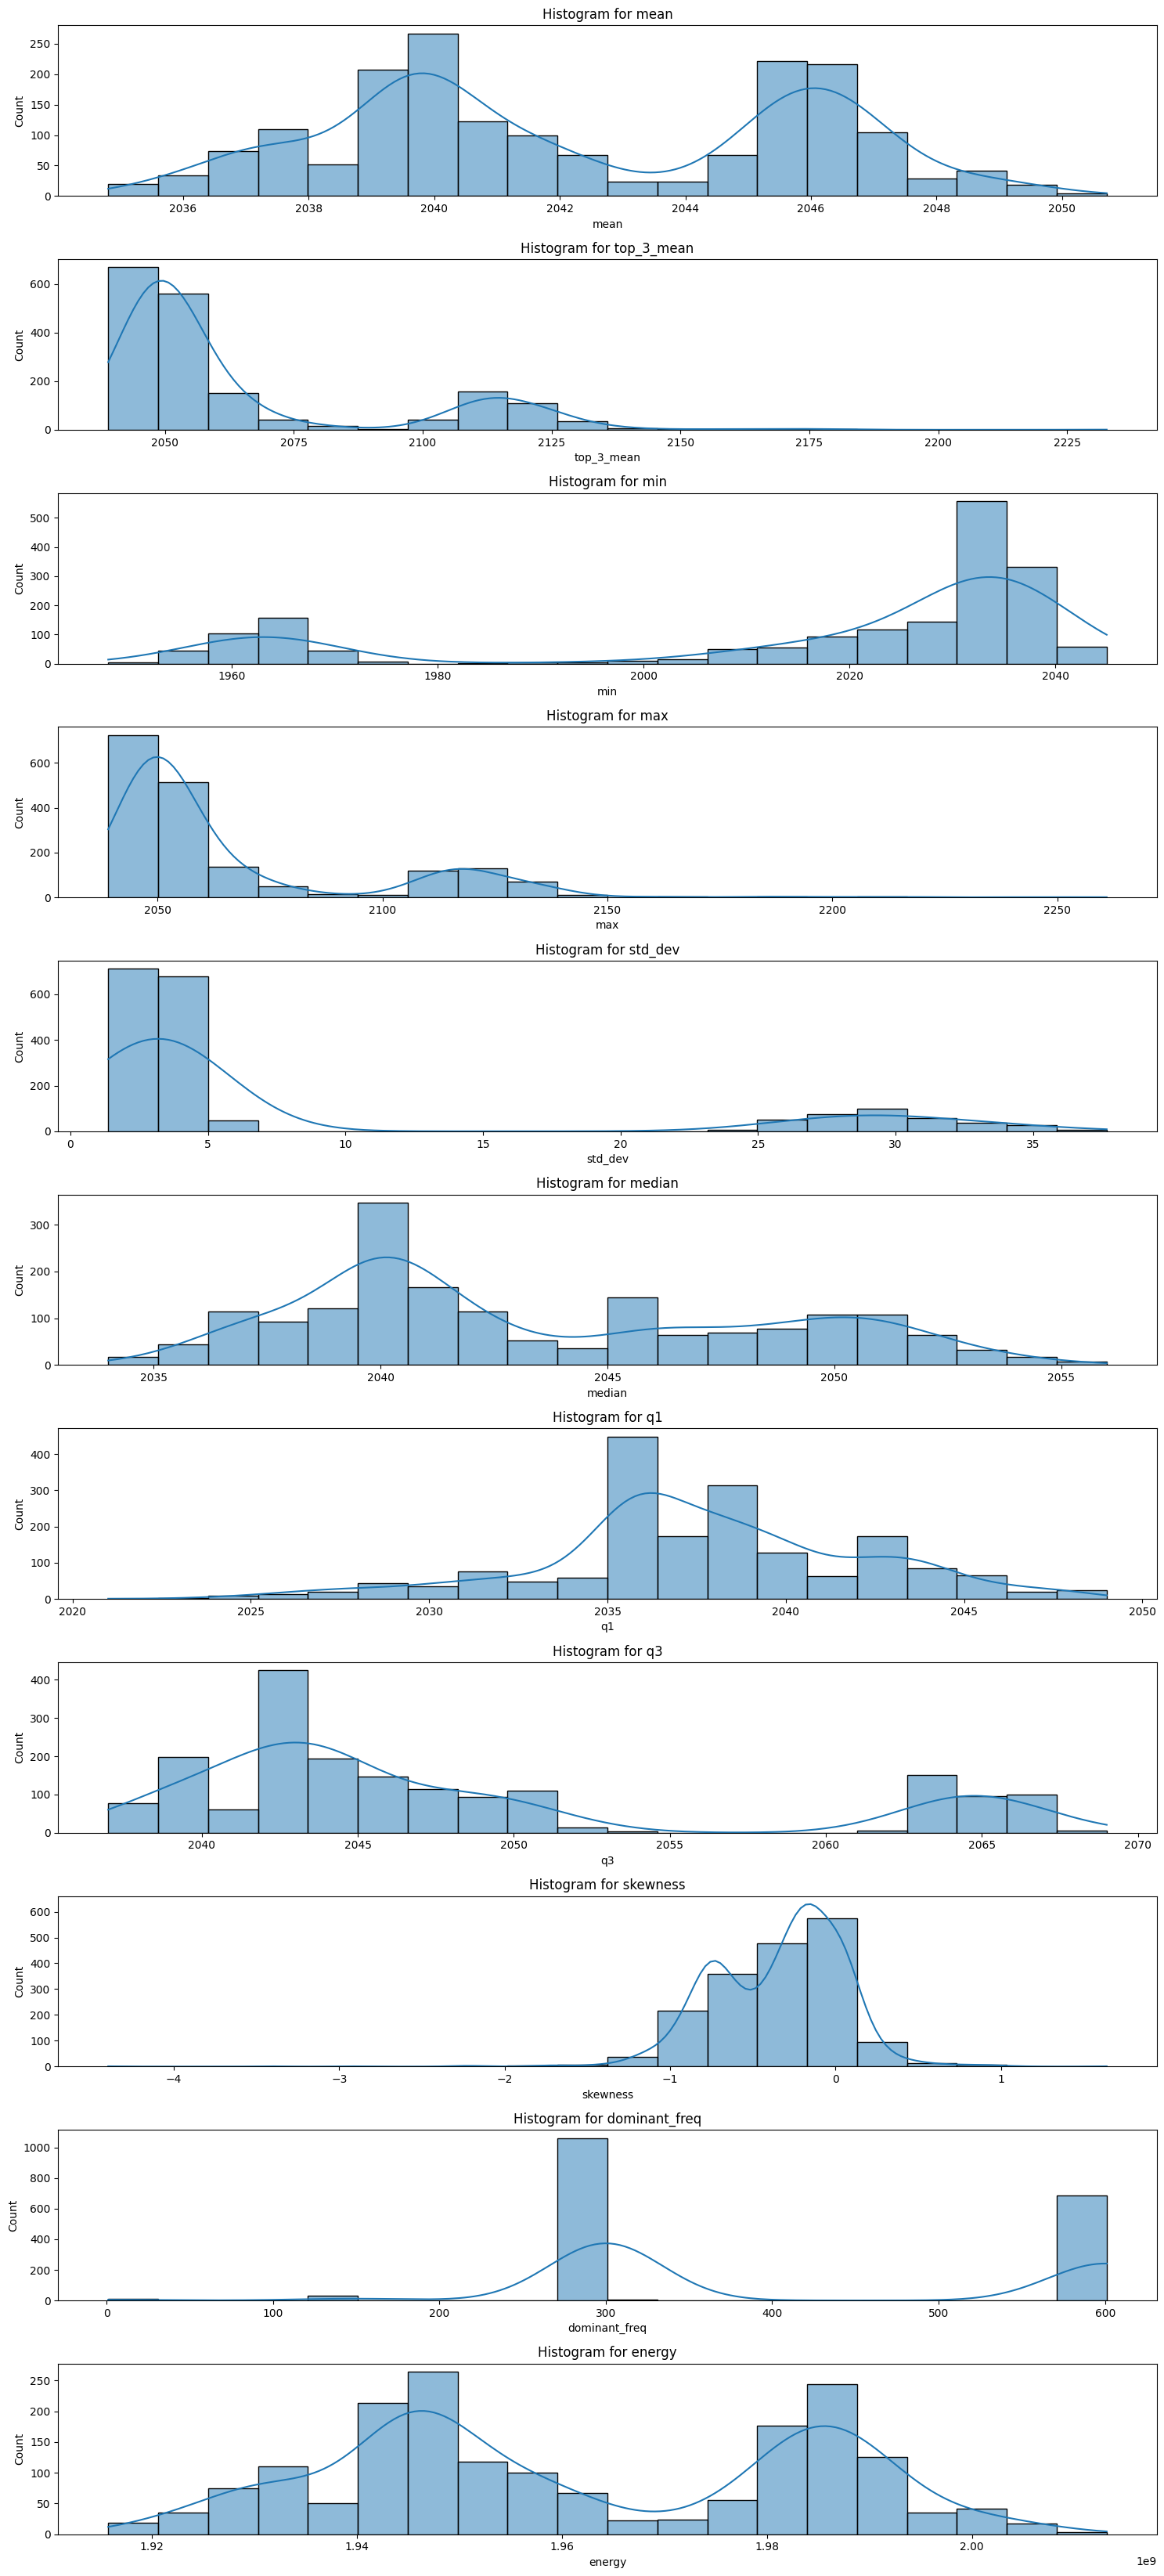

In [22]:
numerical_column=data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15,len(numerical_column)*3))
for i, col in enumerate(numerical_column,1):
    plt.subplot(len(numerical_column),1,i)
    sns.histplot(data[col],kde=True,bins=20)
    plt.title(F"Histogram for {col}")
plt.tight_layout()
plt.show()

In [23]:
le=LabelEncoder()
data["timestamp"]=le.fit_transform(data["timestamp"])
data["name"]=le.fit_transform(data["name"])
data["activity"]=le.fit_transform(data["activity"])

<Axes: >

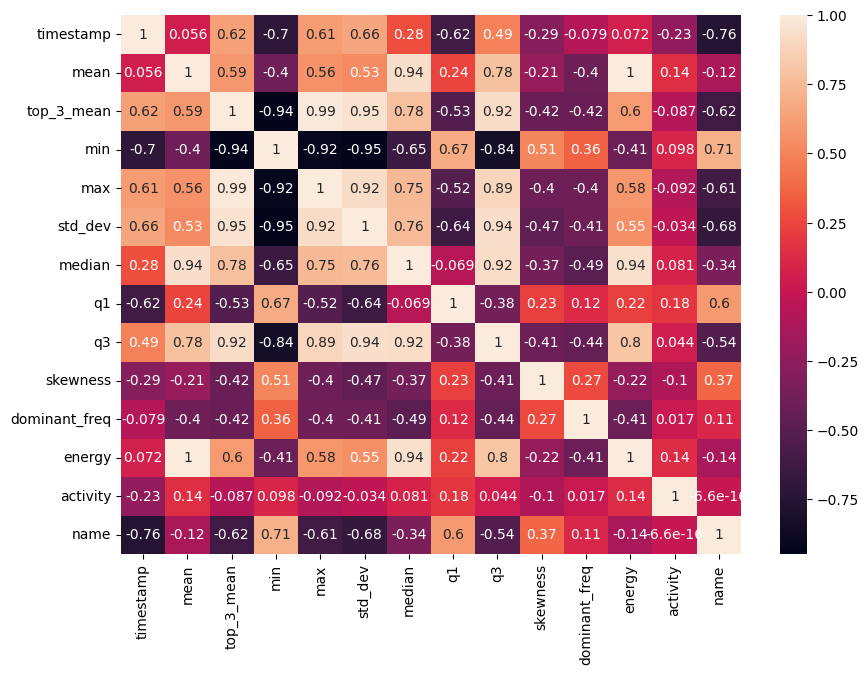

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [45]:
x=data.drop(["activity"],axis=1)
y=data["activity"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
}

In [49]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [51]:
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}:")
    print(f"{accuracy*100}:")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Random Forest Classifier:
98.88888888888889:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       105
           1       0.98      0.98      0.98       128
           2       1.00      0.99      1.00       127

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

------------------------------------------------------------
Decision Tree Classifier:
98.33333333333333:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.98      0.97      0.98       128
           2       1.00      0.99      1.00       127

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

------------------------------------------------------------
Ada Boost Classifier:
85.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


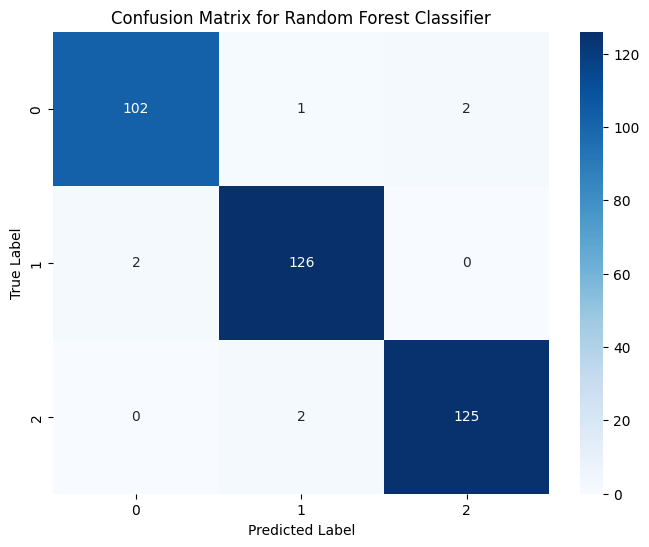

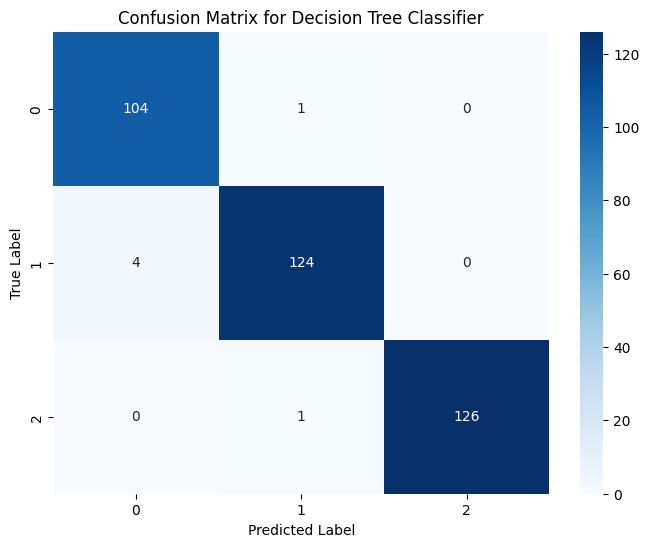

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


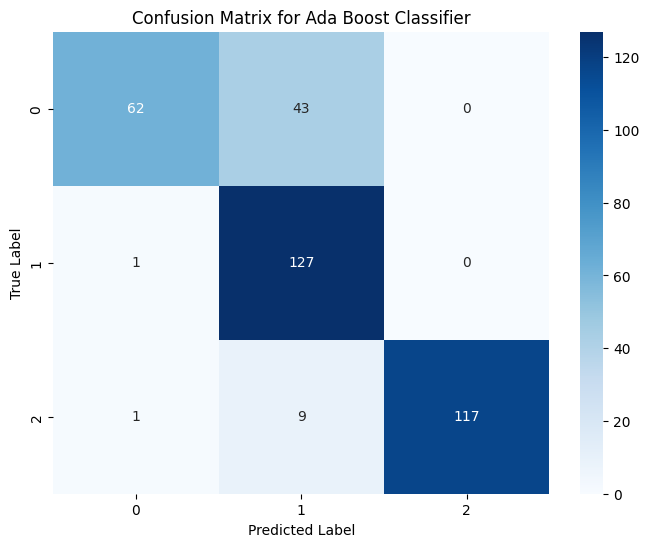

In [52]:
accuracy_results={}
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [53]:
accuracy_df = pd.DataFrame(accuracy_results.items(), columns=['Classifier', 'Accuracy'])

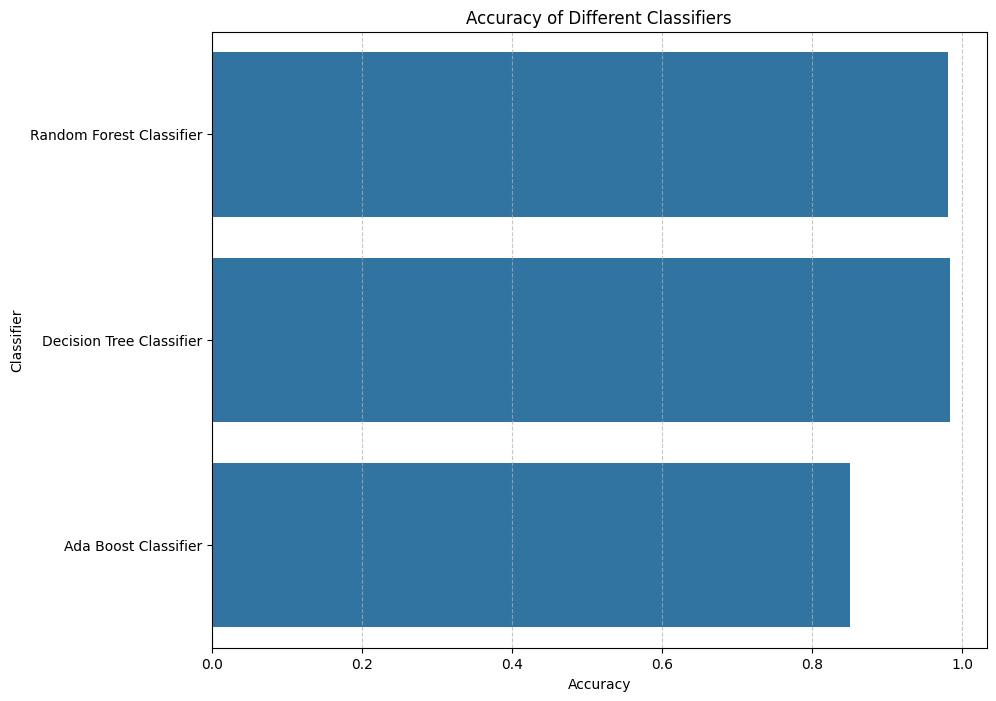

In [55]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Classifier", data=accuracy_df)
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier") 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()